In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
#sns.set(style="ticks")
from scipy import signal
from scipy.optimize import leastsq
from scipy.fft import rfft, rfftfreq

import fontstyle
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import math
import csv
from dateutil import parser
from datetime import datetime, timedelta
import heartpy as hp

In [12]:
timemarkers= pd.read_csv('/Users/juliapersche/develop/Footbit/data_extracted/Least compress ground truth /16_timemarkers.csv')
slow_move100 = timemarkers['ts'][0]
stationary1_100 = timemarkers['ts'][1]
fast_move100 = timemarkers['ts'][2]
stationary2_100 = timemarkers['ts'][3]

stationary1_200 = timemarkers['ts'][4]
slow_move200 = timemarkers['ts'][5]
stationary2_200 = timemarkers['ts'][6]
fast_move200= timemarkers['ts'][7]

timemarkers.ts = pd.to_datetime(timemarkers.ts)
timemarkers = timemarkers.set_index('ts')

timemarkers.head(10)

,name,description
ts,,
2023-04-13 18:38:51.383,12335stop,slow
2023-04-13 18:39:44.138,ststionsry,NaN
2023-04-13 18:40:06.486,12345stop,NaN
2023-04-13 18:40:38.356,stationary,NaN
2023-04-13 18:41:03.813,stationary 200,NaN
2023-04-13 18:41:29.774,12345stop slow,NaN
2023-04-13 18:42:20.923,starionary,NaN
2023-04-13 18:42:47.931,12345stop fast,NaN
2023-04-13 18:43:23.727,stationsry,NaN


In [13]:
#accel
accel= pd.read_csv('/Users/juliapersche/develop/Footbit/data_extracted/Least compress ground truth /16_accel.csv')
accel.ts = pd.to_datetime(accel.ts)
accel = accel.set_index('ts')

#Timestamps 
start= accel.index[0]
end_index = (len(accel.index)) - 1
end = accel.index[-1]

accel1 = accel.loc[start:stationary2_100, :]
accel2 = accel.loc[stationary2_100:end, :]
finalend = accel2.index[-400]

accel2.head()

,x,y,z
ts,,,
2023-04-13 18:40:38.402570,-9.83,-0.88,1.45
2023-04-13 18:40:38.503570,-9.59,-1.15,1.39
2023-04-13 18:40:38.604570,-9.74,-0.73,1.31
2023-04-13 18:40:38.705570,-9.67,-0.78,1.12
2023-04-13 18:40:38.806570,-9.85,-0.15,0.99


In [4]:
# energy_peaks, _ = find_peaks(accel['energy'], height=.4)
# plt.plot(accel['energy'])
# plt.plot(energy_peaks, accel['energy'][energy_peaks], "x")


In [14]:
ppg= pd.read_csv('/Users/juliapersche/develop/Footbit/data_extracted/Least compress ground truth /16_ppg.csv')
ppg.ts = pd.to_datetime(ppg.ts)
ppg = ppg.set_index('ts')
ppg1 = ppg.loc[start:stationary2_100, :]
ppg2 = ppg.loc[stationary2_100:end, :]



ppg2.tail(10)

,red,ir,green
ts,,,
2023-04-13 18:44:01.695570,95252.0,132838.0,7786.0
2023-04-13 18:44:01.700570,95260.0,132780.0,7785.0
2023-04-13 18:44:01.704570,95258.0,132850.0,7784.0
2023-04-13 18:44:01.709570,95237.0,132892.0,7790.0
2023-04-13 18:44:01.715570,95294.0,132877.0,7755.0
2023-04-13 18:44:01.720570,95322.0,132901.0,7788.0
2023-04-13 18:44:01.725570,95378.0,132863.0,7801.0
2023-04-13 18:44:01.730570,95366.0,132920.0,7804.0
2023-04-13 18:44:01.735571,95387.0,133014.0,7806.0


In [15]:
polar= pd.read_csv('/Users/juliapersche/develop/Footbit/data_extracted/Least compress ground truth /16_polar.csv')
polar['ts'] = (pd.to_datetime(polar['time'], unit='ns'))

polar = polar[polar['ts'] >= start]
polar = polar[polar['ts'] <= end]

polar = polar.set_index('ts')

polar.tail()

,time,ecg,hr,rr,marker
ts,,,,,
2023-04-13 18:44:01.710161470,1681411441710161470,-0.253,NaN,NaN,NaN
2023-04-13 18:44:01.717859600,1681411441717859600,-0.226,NaN,NaN,NaN
2023-04-13 18:44:01.725557730,1681411441725557730,-0.164,NaN,NaN,NaN
2023-04-13 18:44:01.733255860,1681411441733255860,-0.153,NaN,NaN,NaN
2023-04-13 18:44:01.740953990,1681411441740953990,-0.141,NaN,NaN,NaN


In [16]:
po= pd.read_csv('/Users/juliapersche/develop/Footbit/data_extracted/Least compress ground truth /16_po.csv')
po['ts'] = (pd.to_datetime(po['Timestamp'], unit='s'))
po= po.drop(['Session', 'Date', 'Time', 'Index'], axis=1)

po = po[po['ts'] >= start]
po = po[po['ts'] <= end]

po.ts = pd.to_datetime(po.ts)
po = po.set_index('ts')
po.tail()

,Timestamp,O2 Saturation,Pulse Rate,Breaths / min,Pleth Variability,Perfusion Index
ts,,,,,,
2023-04-13 18:43:57,1681411437,99,93,--,17,0.49
2023-04-13 18:43:58,1681411438,99,93,--,17,0.49
2023-04-13 18:43:59,1681411439,99,92,--,17,0.49
2023-04-13 18:44:00,1681411440,99,92,--,17,0.49
2023-04-13 18:44:01,1681411441,99,92,--,17,0.49


### Calculate Sampling Frequencies


In [18]:
#Sampling Frequencies
polar_length = (polar.index[-1]-polar.index[0]).total_seconds()
polar_sps = len(polar['ecg'])/(polar_length)
ppg_1 = 100
ppg_2 = 200



In [19]:
ppg100IR_normalized = (ppg1['ir'] - ppg1['ir'].mean())/ (ppg1['ir'].max()- ppg1['ir'].min())
ppg100RED_normalized = (ppg1['red'] - ppg1['red'].mean())/ (ppg1['red'].max()- ppg1['red'].min())
ppg100GREEN_normalized = (ppg1['green'] - ppg1['green'].mean())/ (ppg1['green'].max()- ppg1['green'].min())

ppg200IR_normalized = (ppg2['ir'] - ppg2['ir'].mean())/ (ppg2['ir'].max()- ppg2['ir'].min())
ppg200RED_normalized = (ppg2['red'] - ppg2['red'].mean())/ (ppg2['red'].max()- ppg2['red'].min())
ppg200GREEN_normalized = (ppg2['green'] - ppg2['green'].mean())/ (ppg2['green'].max()- ppg2['green'].min())


polar_normalized = (polar['ecg'] - polar['ecg'].mean())/ (polar['ecg'].max()- polar['ecg'].min())

#Computing energy (of accel)
accel['x_norm'] = (accel['x'] - accel['x'].mean()) / (accel['x'].max() - accel['x'].min())
accel['y_norm'] = (accel['y'] - accel['y'].mean()) / (accel['y'].max() - accel['y'].min())
accel['z_norm'] = (accel['z'] - accel['z'].mean()) / (accel['z'].max() - accel['z'].min())

accel_energy = (accel['x_norm']**2 + accel['y_norm']**2 + accel['z_norm']**2)*3  #nned to be able to see peaks




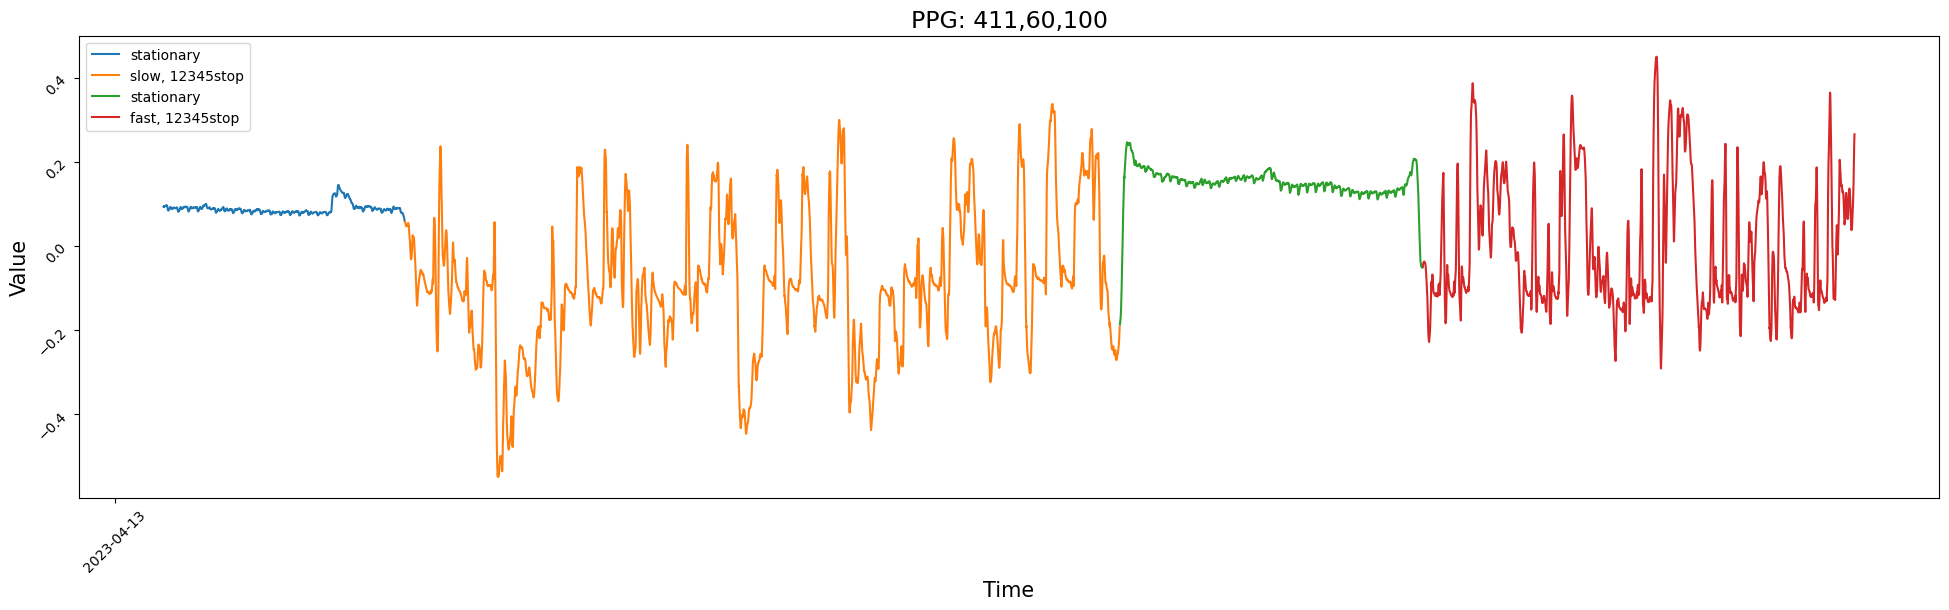

In [25]:
fig,ax = plt.subplots(figsize=(24,6))

plt.plot(ppg100IR_normalized[start:slow_move100], label = 'stationary')
plt.plot(ppg100IR_normalized[slow_move100:stationary1_100], label = 'slow, 12345stop')
plt.plot(ppg100IR_normalized[stationary1_100:fast_move100], label = 'stationary')
plt.plot(ppg100IR_normalized[fast_move100:stationary2_100], label = 'fast, 12345stop')

plt.ylabel('Value',fontsize = 15) 
plt.xlabel('Time', fontsize = 15)
plt.title('PPG: 411,60,100', fontsize = 17)
xticklabels = ax.set_xticks(ax.get_xticks()[::2000])
ax.tick_params(axis='both', which='major', labelsize=10, rotation = 45)
#ax.set_xticklabels(xticklabels, rotation = 45)

ax.legend()
plt.show()

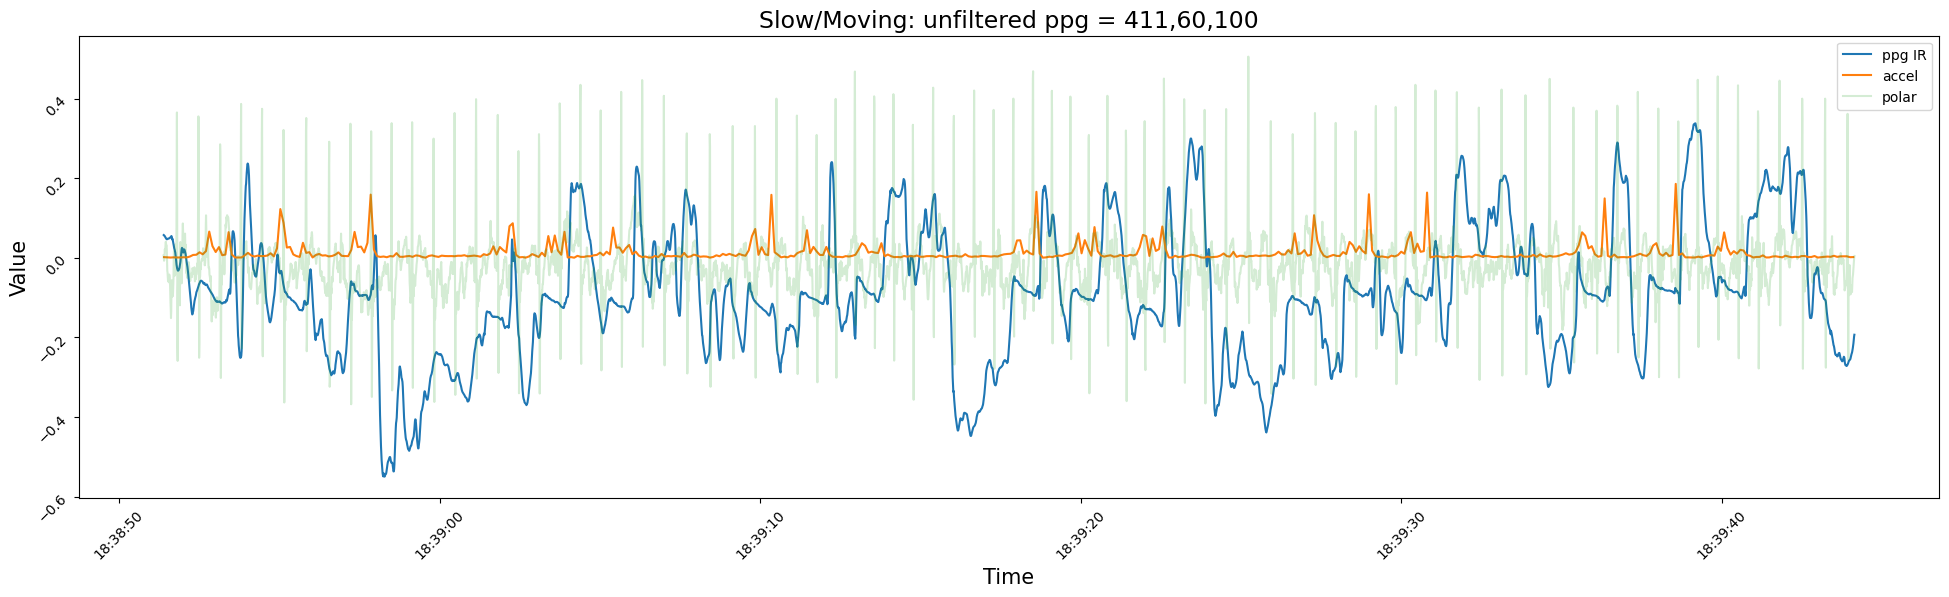

In [64]:
fig,ax = plt.subplots(figsize=(24,6))
ax.plot(ppg100IR_normalized[slow_move100:stationary1_100],label ='ppg IR')
ax.plot(accel_energy[slow_move100:stationary1_100], label ='accel')
ax.plot(polar_normalized[slow_move100:stationary1_100], label ='polar', alpha = .2)

plt.ylabel('Value',fontsize = 15) 
plt.xlabel('Time', fontsize = 15)
plt.title('Slow/Moving: unfiltered ppg = 411,60,100', fontsize = 17)
#ax.set_xticks(ax.get_xticks()[::5000])
ax.tick_params(axis='both', which='major', labelsize=10, rotation = 45)

plt.legend()
plt.show()

In [27]:
polar_filter =  signal.butter(3, [.5,15], btype="bandpass", fs=polar_sps, output="sos") 
polar_filtered = signal.sosfilt(polar_filter, polar_normalized)
polar['filtered ecg'] = polar_filtered


ppg_IR_100 = ppg100IR_normalized[start:stationary2_100]
ppg_IR_200 = ppg200IR_normalized[stationary2_100:end]
ir100_filter =  signal.butter(3, [.5,8], btype="bandpass", fs=ppg_1, output="sos") 
ir200_filter =  signal.butter(3, [.5,8], btype="bandpass", fs=ppg_2, output="sos") 

ir100_filtered = signal.sosfilt(ir100_filter, ppg_IR_100)
ppg1['filtered ir'] = ir100_filtered

ir200_filtered = signal.sosfilt(ir200_filter, ppg_IR_200)
ppg2['filtered ir'] = ir200_filtered


/var/folders/xv/_kt5cgd12jl2mt2z16gq8ryw0000gn/T/ipykernel_14013/3154581985.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppg1['filtered ir'] = ir100_filtered
/var/folders/xv/_kt5cgd12jl2mt2z16gq8ryw0000gn/T/ipykernel_14013/3154581985.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppg2['filtered ir'] = ir200_filtered


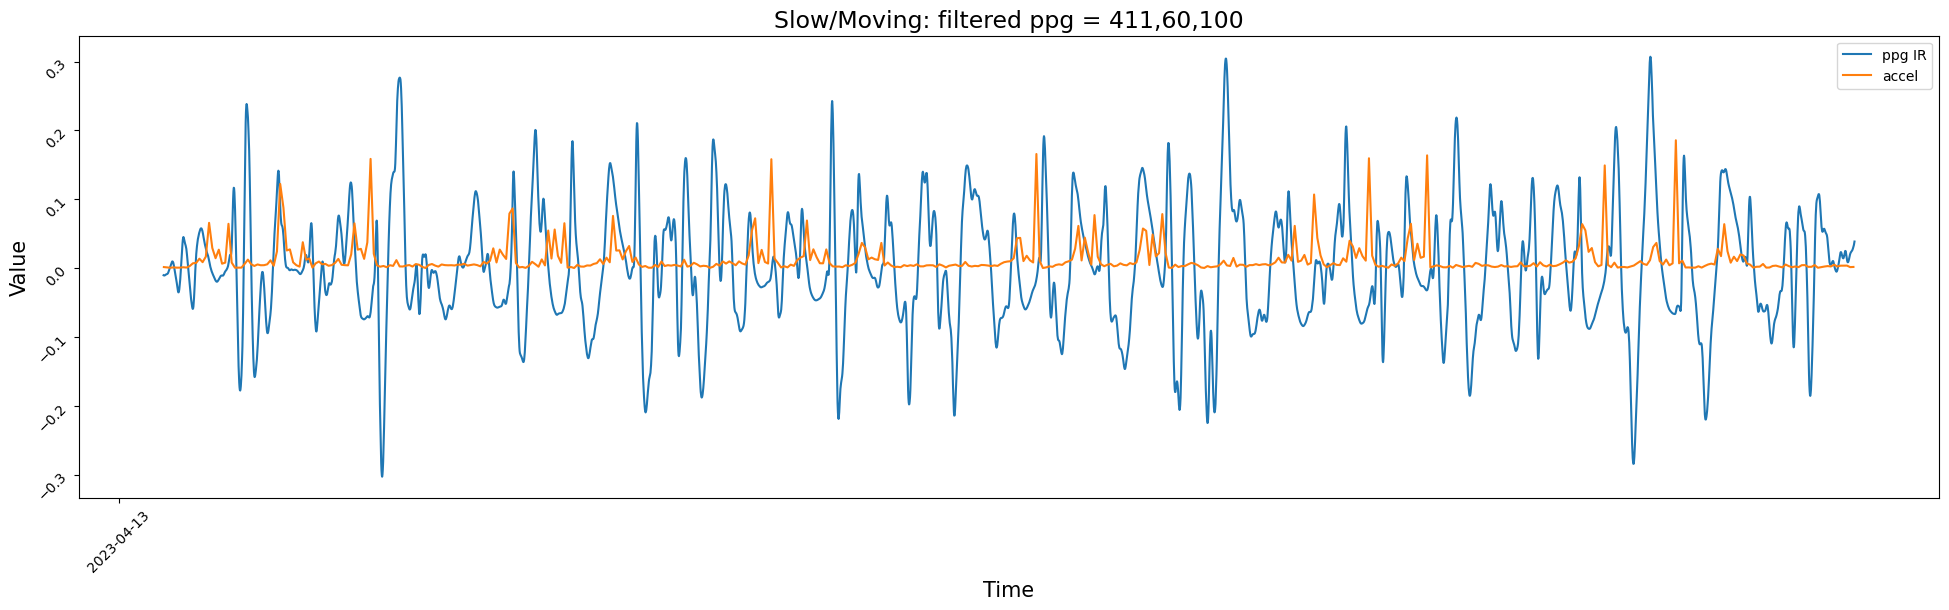

In [28]:
fig,ax = plt.subplots(figsize=(24,6))
ax.plot(ppg1['filtered ir'][slow_move100:stationary1_100],label ='ppg IR')
ax.plot(accel_energy[slow_move100:stationary1_100], label ='accel')
#ax.plot(polar['filtered ecg'][slow_move100:stationary1_100], label ='polar', alpha = .5)

plt.ylabel('Value',fontsize = 15) 
plt.xlabel('Time', fontsize = 15)
plt.title('Slow/Moving: filtered ppg = 411,60,100', fontsize = 17)
ax.set_xticks(ax.get_xticks()[::5000])
ax.tick_params(axis='both', which='major', labelsize=10, rotation = 45)

plt.legend()
plt.show()

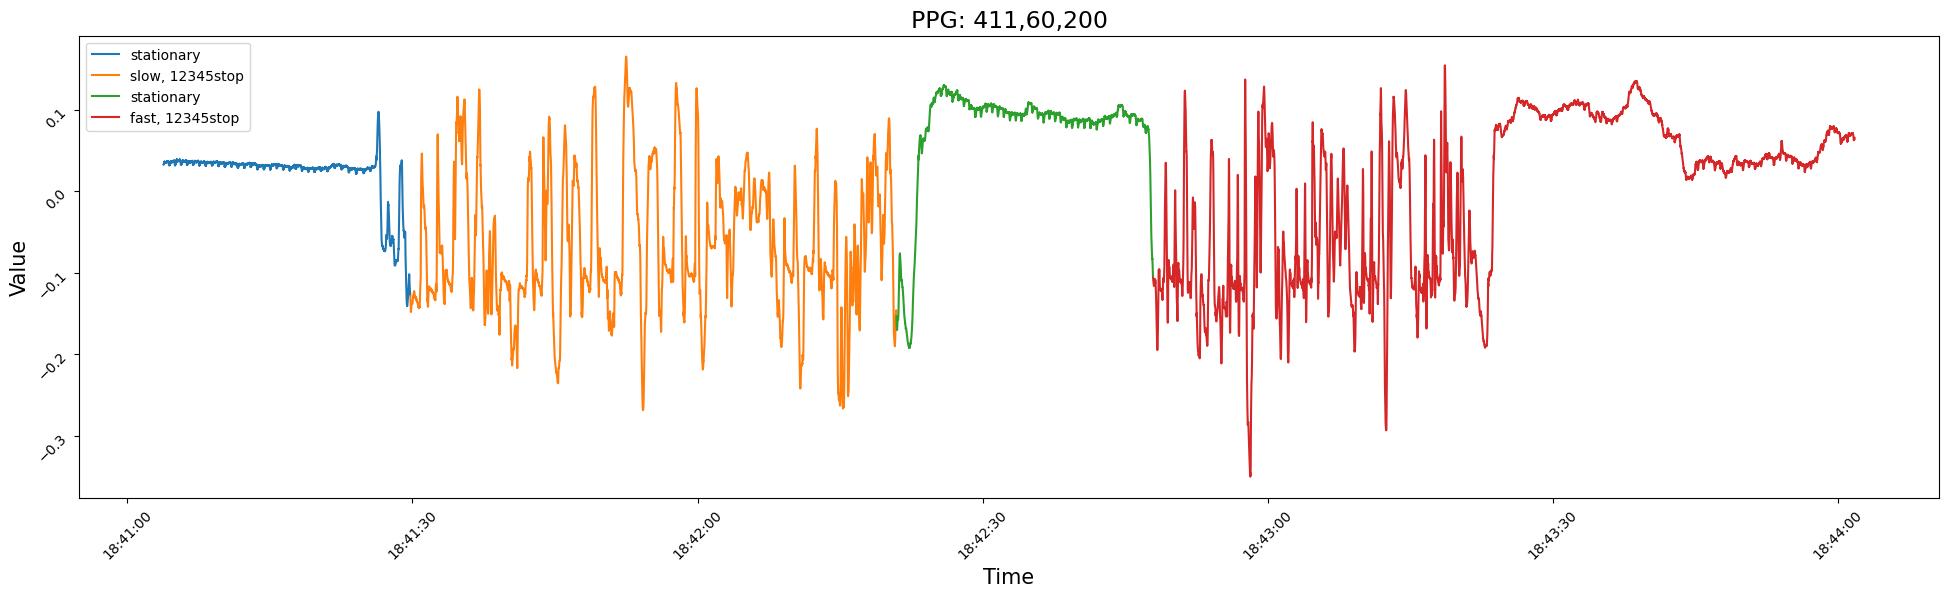

In [29]:
fig,ax = plt.subplots(figsize=(24,6))

#plt.plot(ppg200IR_normalized[stationary2_100:stationary1_200], label = 'stationary')
plt.plot(ppg200IR_normalized[stationary1_200:slow_move200], label = 'stationary')
plt.plot(ppg200IR_normalized[slow_move200:stationary2_200], label = 'slow, 12345stop')
plt.plot(ppg200IR_normalized[stationary2_200:fast_move200], label = 'stationary')
plt.plot(ppg200IR_normalized[fast_move200:end], label = 'fast, 12345stop')

plt.ylabel('Value',fontsize = 15) 
plt.xlabel('Time', fontsize = 15)
plt.title('PPG: 411,60,200', fontsize = 17)
#xticklabels = ax.set_xticks(ax.get_xticks()[::1000])
ax.tick_params(axis='both', which='major', labelsize=10, rotation = 45)
#ax.set_xticklabels(xticklabels, rotation = 45)

ax.legend()
plt.show()


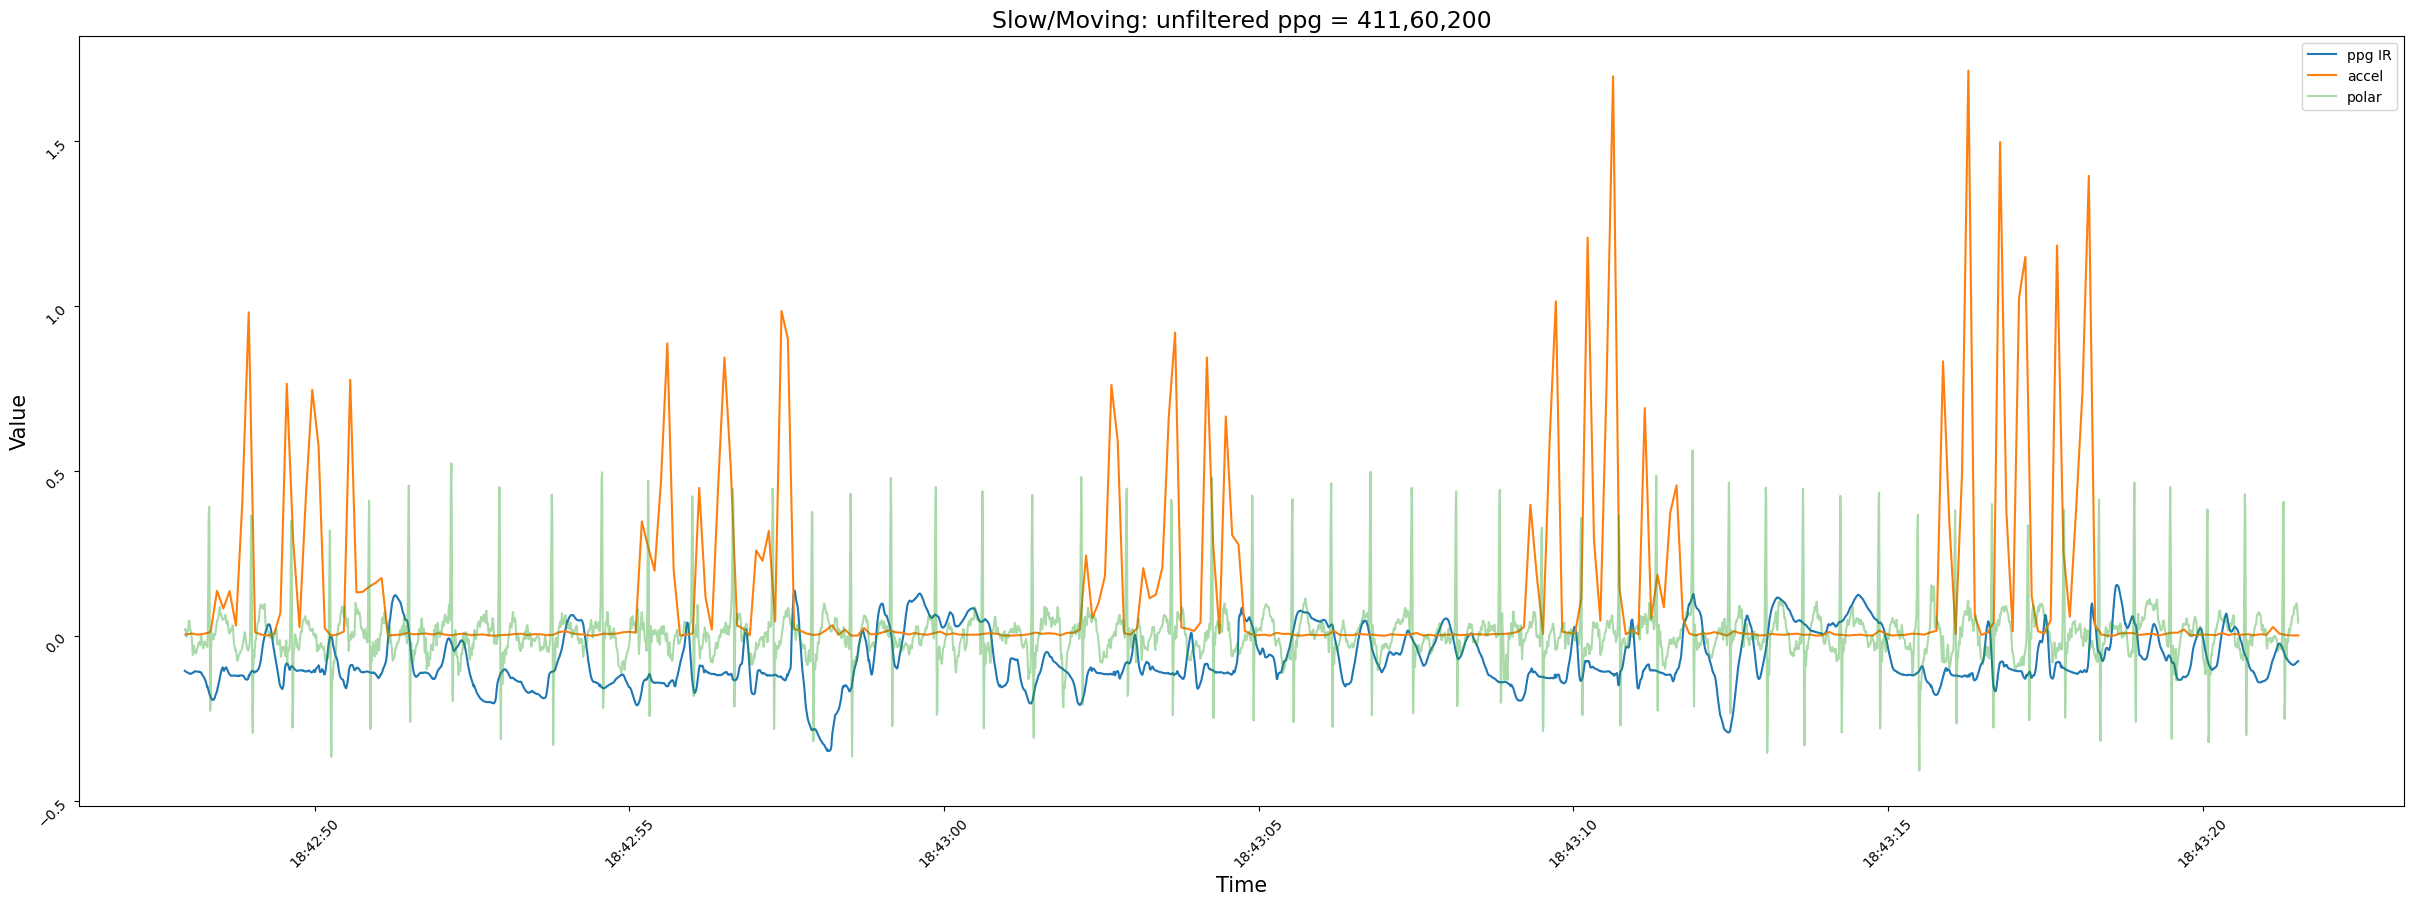

In [65]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(ppg200IR_normalized[fast_move200:finalend],label ='ppg IR')
ax.plot(accel_energy[fast_move200:finalend], label ='accel')
ax.plot(polar_normalized[fast_move200:finalend], label ='polar', alpha = .4)

plt.ylabel('Value',fontsize = 15) 
plt.xlabel('Time', fontsize = 15)
plt.title('Slow/Moving: unfiltered ppg = 411,60,200', fontsize = 17)
#ax.set_xticks(ax.get_xticks()[::1000])
ax.tick_params(axis='both', which='major', labelsize=10, rotation = 45)


plt.legend()
plt.show()

### Normalize and Filter Data at 100 Hz and Data at 200 Hz 

Text(0.5, 1.0, 'Filltered/Walking Fast')

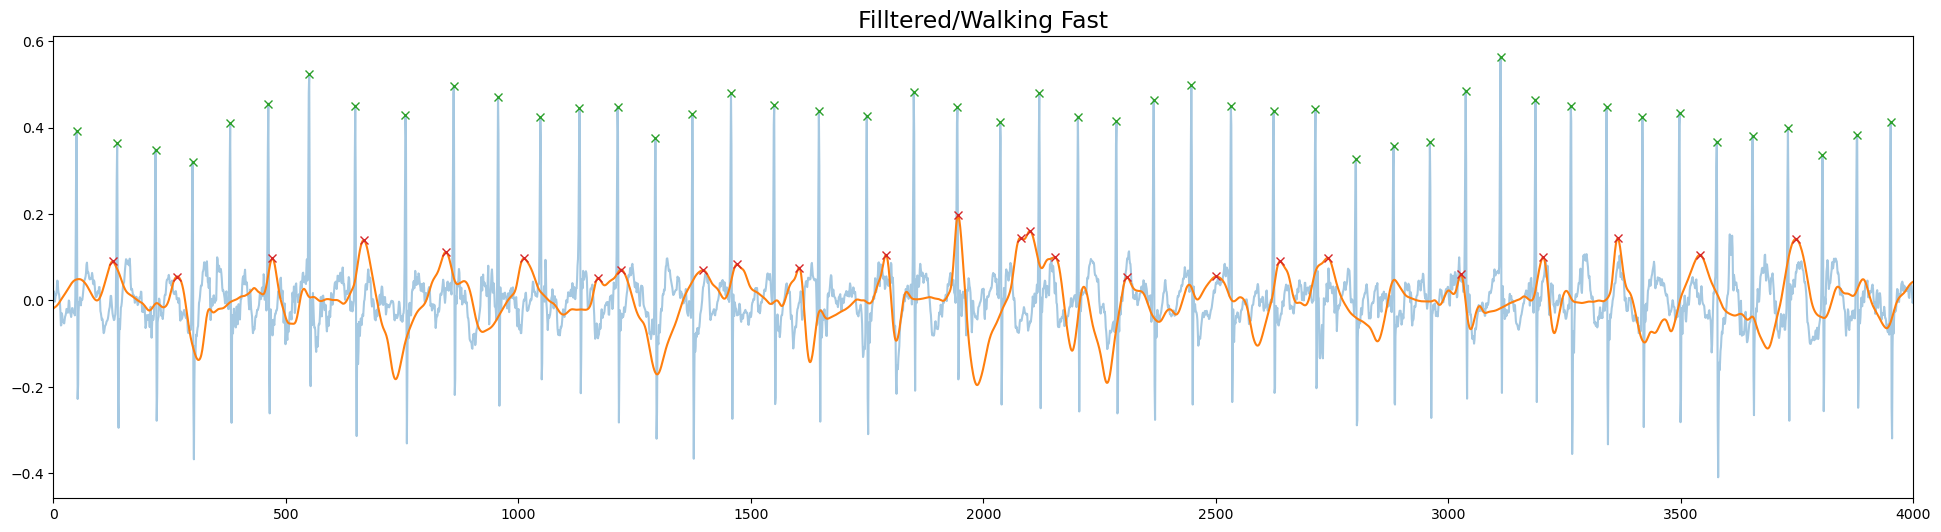

In [51]:
fig,ax = plt.subplots(figsize=(24,6))

HR_polartest = np.array(polar_normalized[fast_move200:finalend])
HR_ppgtest = np.array(ppg2['filtered ir'][fast_move200:finalend] )

polar_peaks, _ = find_peaks(HR_polartest, height=.2)
ppg_peaks, _ = find_peaks(HR_ppgtest, height=.05)
plt.plot(HR_polartest, alpha = .4)
plt.plot(HR_ppgtest)
plt.plot(polar_peaks, HR_polartest[polar_peaks], "x")
plt.plot(ppg_peaks, HR_ppgtest[ppg_peaks], "x")

plt.xlim(0,4000)
plt.title('Filltered/Walking Fast', fontsize = 17)

Text(0.5, 1.0, 'Filltered Standing Still Fast')

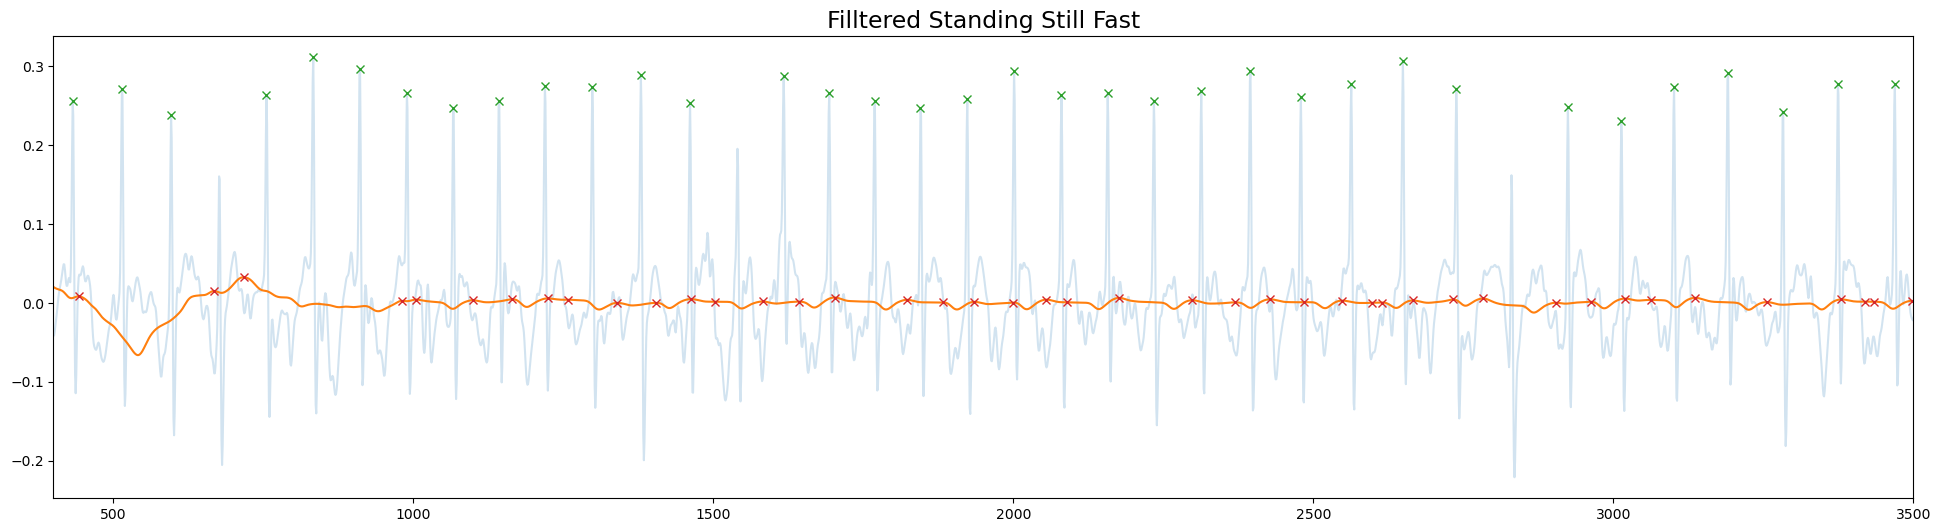

In [57]:
fig,ax = plt.subplots(figsize=(24,6))

HR_polartest = np.array(polar['filtered ecg'][stationary2_200:fast_move200])
HR_ppgtest = np.array(ppg2['filtered ir'][stationary2_200:fast_move200] )

polar_peaks, _ = find_peaks(HR_polartest, height=.2)
ppg_peaks, _ = find_peaks(HR_ppgtest, height=0)
plt.plot(HR_polartest, alpha = .2)
plt.plot(HR_ppgtest)
plt.plot(polar_peaks, HR_polartest[polar_peaks], "x")
plt.plot(ppg_peaks, HR_ppgtest[ppg_peaks], "x")

plt.xlim(400,3500)
#plt.ylim(-.2,.2)
plt.title('Filltered Standing Still Fast', fontsize = 17)



### With Heartpy

plt.plot(ppg200IR_normalized[stationary1_200:slow_move200], label = 'stationary')
plt.plot(ppg200IR_normalized[slow_move200:stationary2_200], label = 'slow, 12345stop')
plt.plot(ppg200IR_normalized[stationary2_200:fast_move200], label = 'stationary')
plt.plot(ppg200IR_normalized[fast_move200:end], label = 'fast, 12345stop')


In [ ]:
#stationary1_200 --> slow_move200  (won't run... I think b/c mixed sampling frequencies)


/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0.5, 1.0, 'PPG200 Filltered/Walking Slow')

<Figure size 1200x400 with 0 Axes>

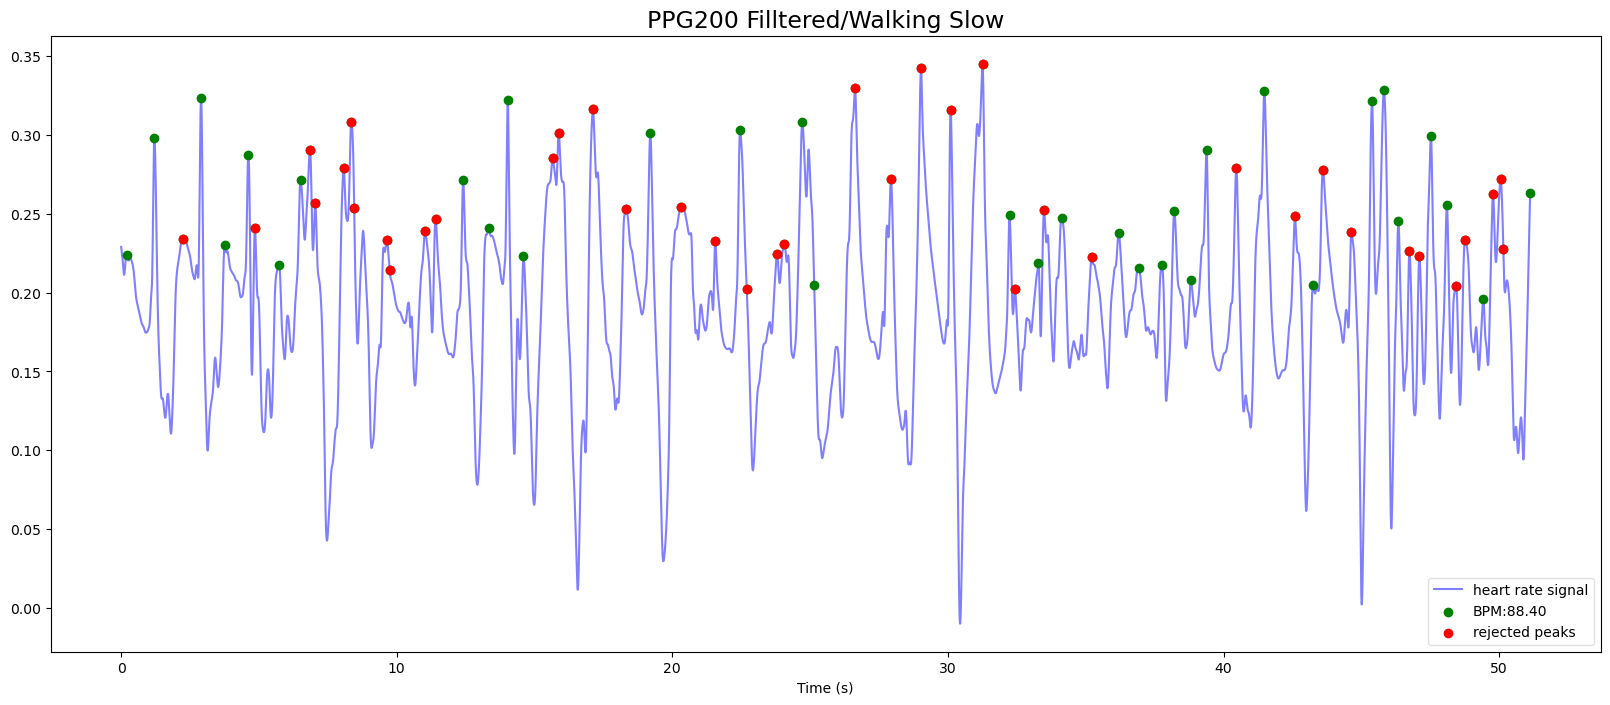

In [47]:
#slow_move200 --> stationary2_200
plt.rcParams["figure.figsize"] = [20,8]
wd_ppg2, m_ppg2 = hp.process(ppg2['filtered ir'][slow_move200:stationary2_200], sample_rate = 200.0)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_ppg2, m_ppg2)
plt.title('PPG200 Filltered/Walking Slow', fontsize = 17)

Text(0.5, 1.0, 'Polar Filtered/ Walking Slow')

<Figure size 1200x400 with 0 Axes>

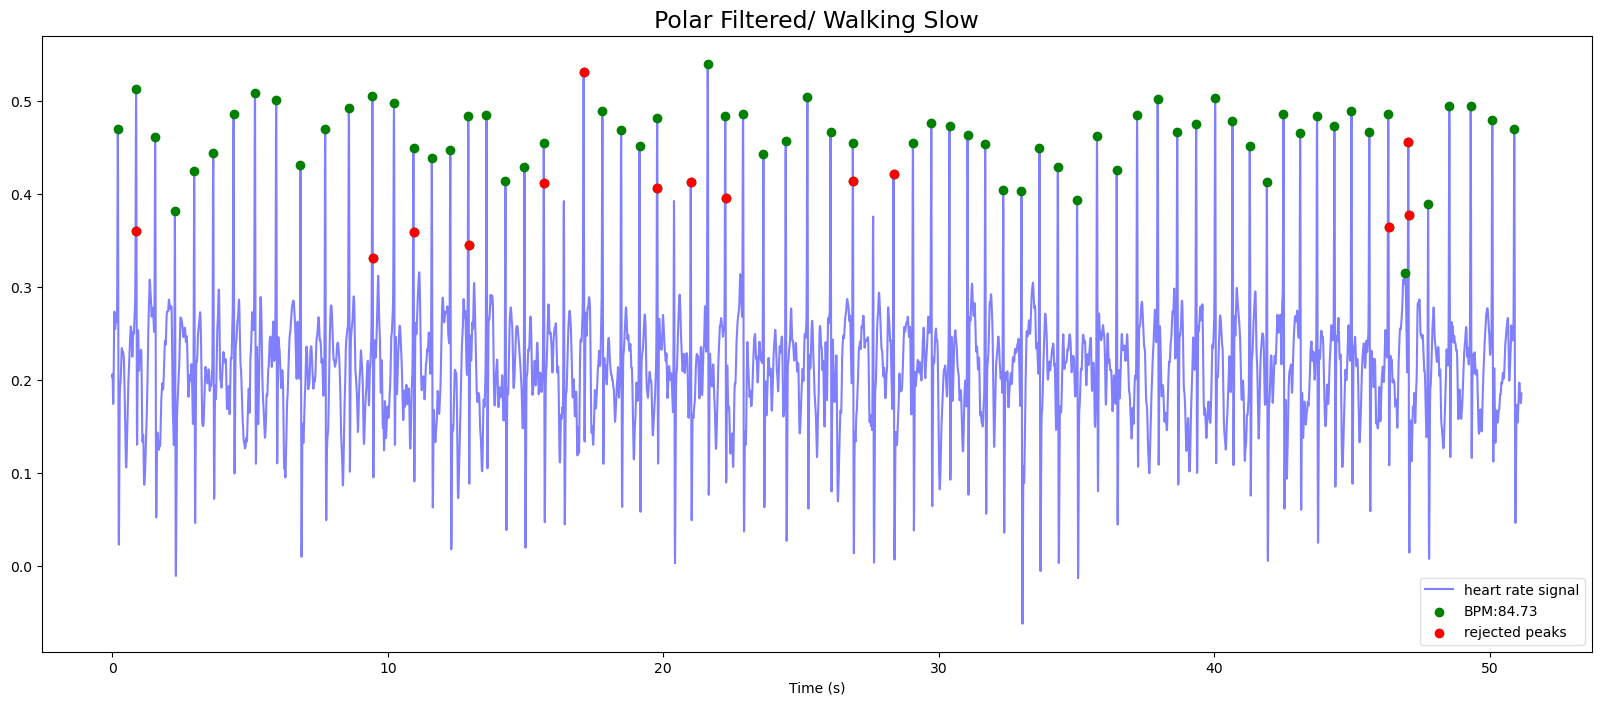

In [48]:
plt.rcParams["figure.figsize"] = [20,8]
wd_polar2, m_polar2 = hp.process(polar['filtered ecg'][slow_move200:stationary2_200], sample_rate = polar_sps)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_polar2, m_polar2)

plt.title('Polar Filtered/ Walking Slow', fontsize = 17)

In [49]:
PPG200Filltered_WalkingSlow = fontstyle.apply('PPG200 Filltered, Walking Slow', 'bold/Italic/orange/GREEN_BG')
print(PPG200Filltered_WalkingSlow)
for measure in m_ppg2.keys():
    print('%s: %f' %(measure, m_ppg2[measure]))

PolarFilltered_WalkingSlow = fontstyle.apply('Polar Filltered, Walking Slow', 'bold/Italic/orange/GREEN_BG')
print(PolarFilltered_WalkingSlow)
for measure in m_polar2.keys():
    print('%s: %f' %(measure, m_polar2[measure]))

PPG200 Filltered, Walking Slow
bpm: 88.397790
ibi: 678.750000
sdnn: 178.680056
sdsd: 113.645213
rmssd: 179.834994
pnn20: 0.875000
pnn50: 0.750000
hr_mad: 167.500000
sd1: 121.210528
sd2: 182.002211
s: 69305.369003
sd1/sd2: 0.665984
breathingrate: 0.276243
Polar Filltered, Walking Slow
bpm: 84.730919
ibi: 708.124034
sdnn: 72.954460
sdsd: 19.572369
rmssd: 28.648152
pnn20: 0.391304
pnn50: 0.086957
hr_mad: 46.190968
sd1: 20.003726
sd2: 104.907334
s: 6592.750281
sd1/sd2: 0.190680
breathingrate: 0.166667


/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.11/site-packages/numpy/ma/core.py:5288: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0.5, 1.0, 'Stopped')

<Figure size 1200x400 with 0 Axes>

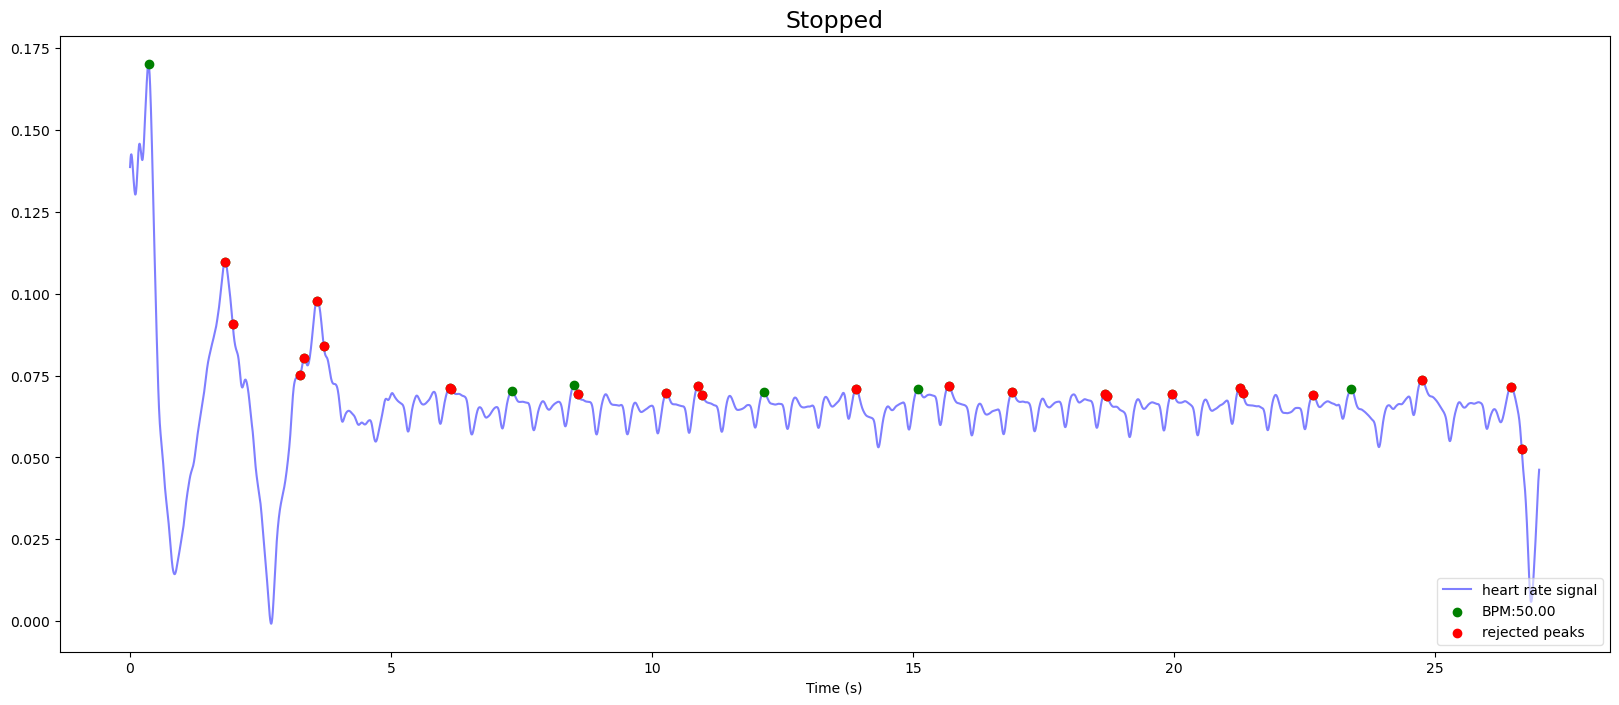

In [50]:
#stationary2_200 --> fast_move200

plt.rcParams["figure.figsize"] = [20,8]
wd_ppg3, m_ppg3 = hp.process(ppg2['filtered ir'][stationary2_200:fast_move200], sample_rate = 200.0)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_ppg3, m_ppg3)
plt.title('Stopped', fontsize = 17)

Text(0.5, 1.0, 'PPG Stopped')

<Figure size 1200x400 with 0 Axes>

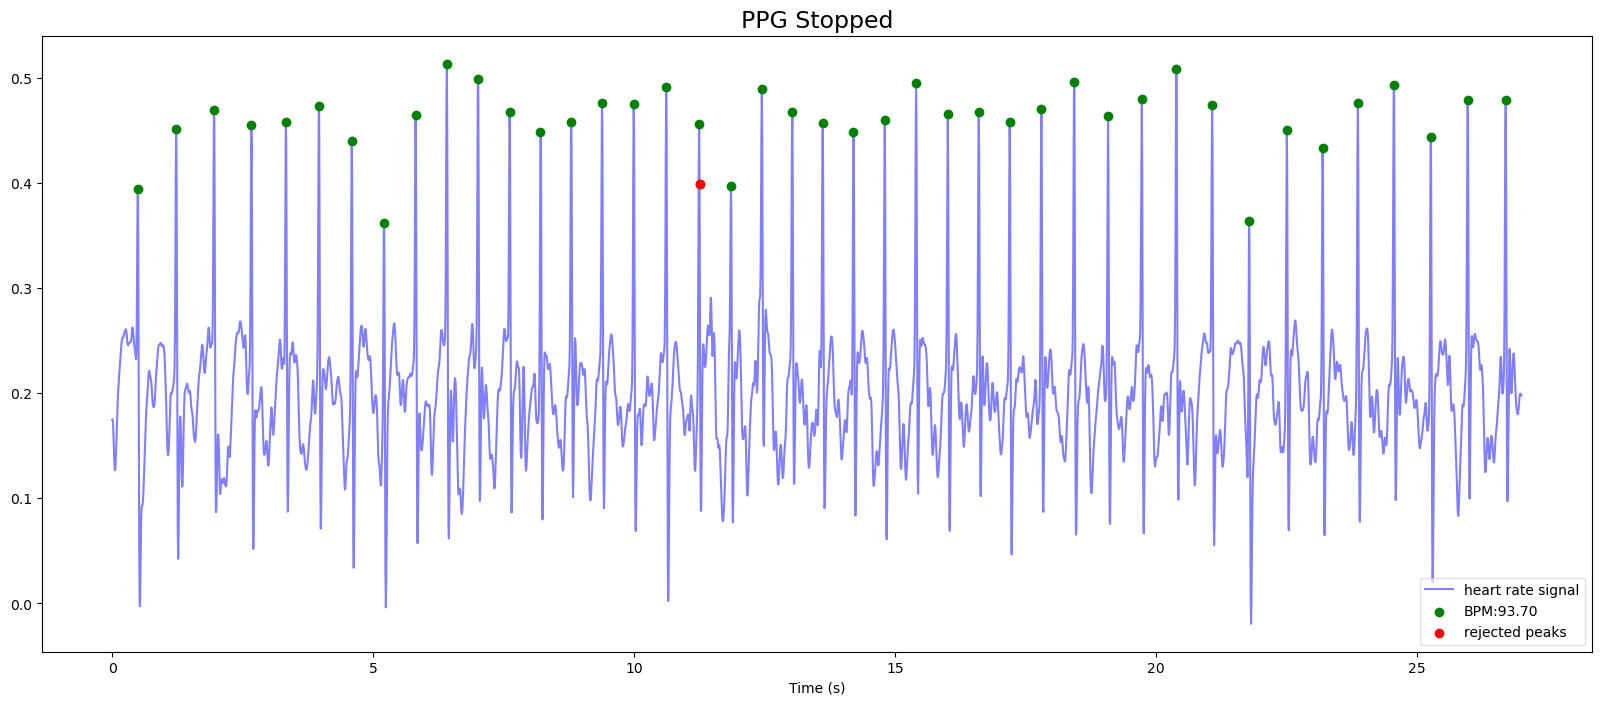

In [62]:
plt.rcParams["figure.figsize"] = [20,8]
wd_polar3, m_polar3 = hp.process(polar['filtered ecg'][stationary2_200:fast_move200], sample_rate = polar_sps)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_polar3, m_polar3)
plt.title('PPG Stopped', fontsize = 17)

Text(0.5, 1.0, 'Polar Stopped')

<Figure size 1200x400 with 0 Axes>

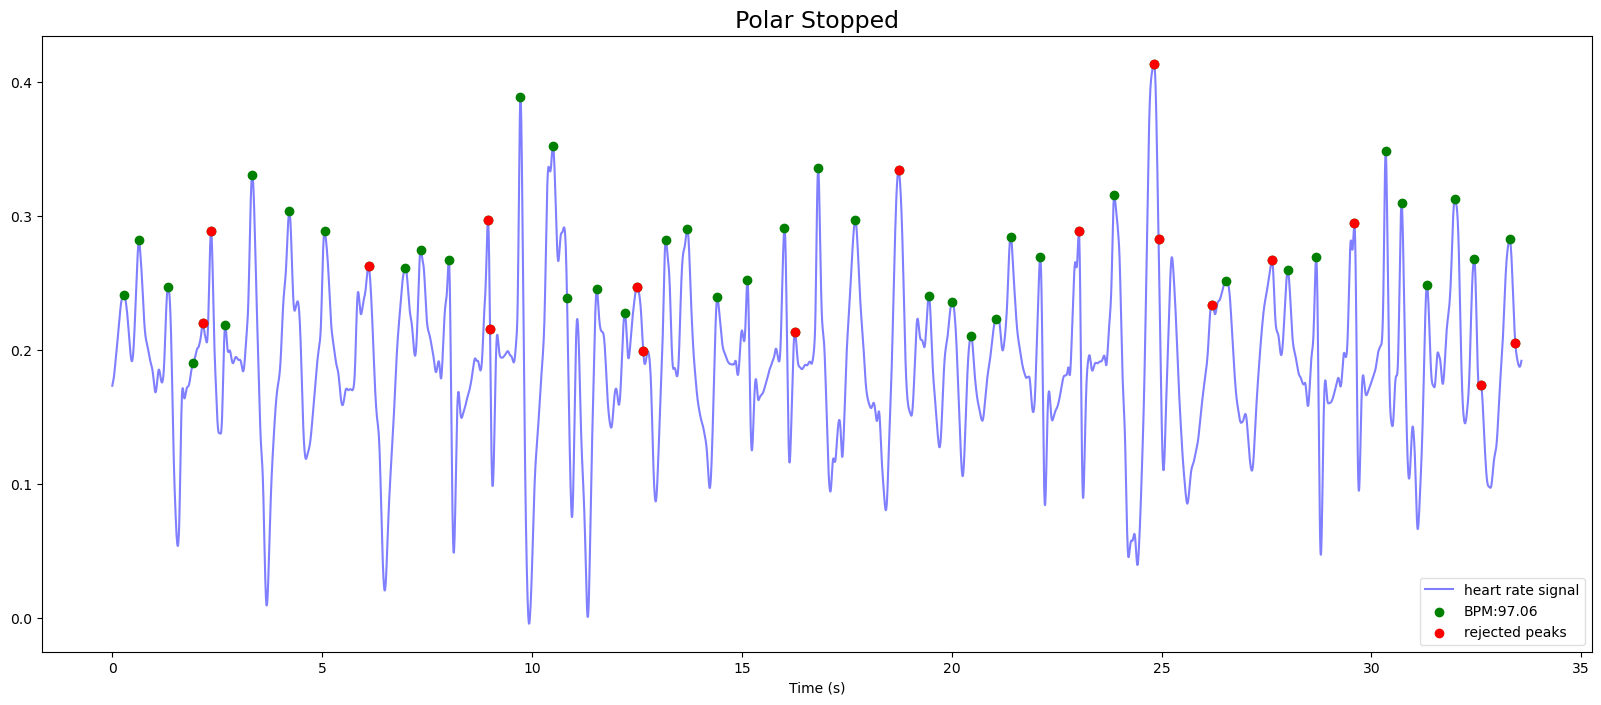

In [63]:
#fast_move200-->end
plt.rcParams["figure.figsize"] = [20,8]
wd_ppg4, m_ppg4 = hp.process(ppg2['filtered ir'][fast_move200:finalend], sample_rate = 200.0)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_ppg4, m_ppg4)
plt.title('Polar Stopped', fontsize = 17)


Text(0.5, 1.0, 'Polar Filtered/ Walking Fast')

<Figure size 1200x400 with 0 Axes>

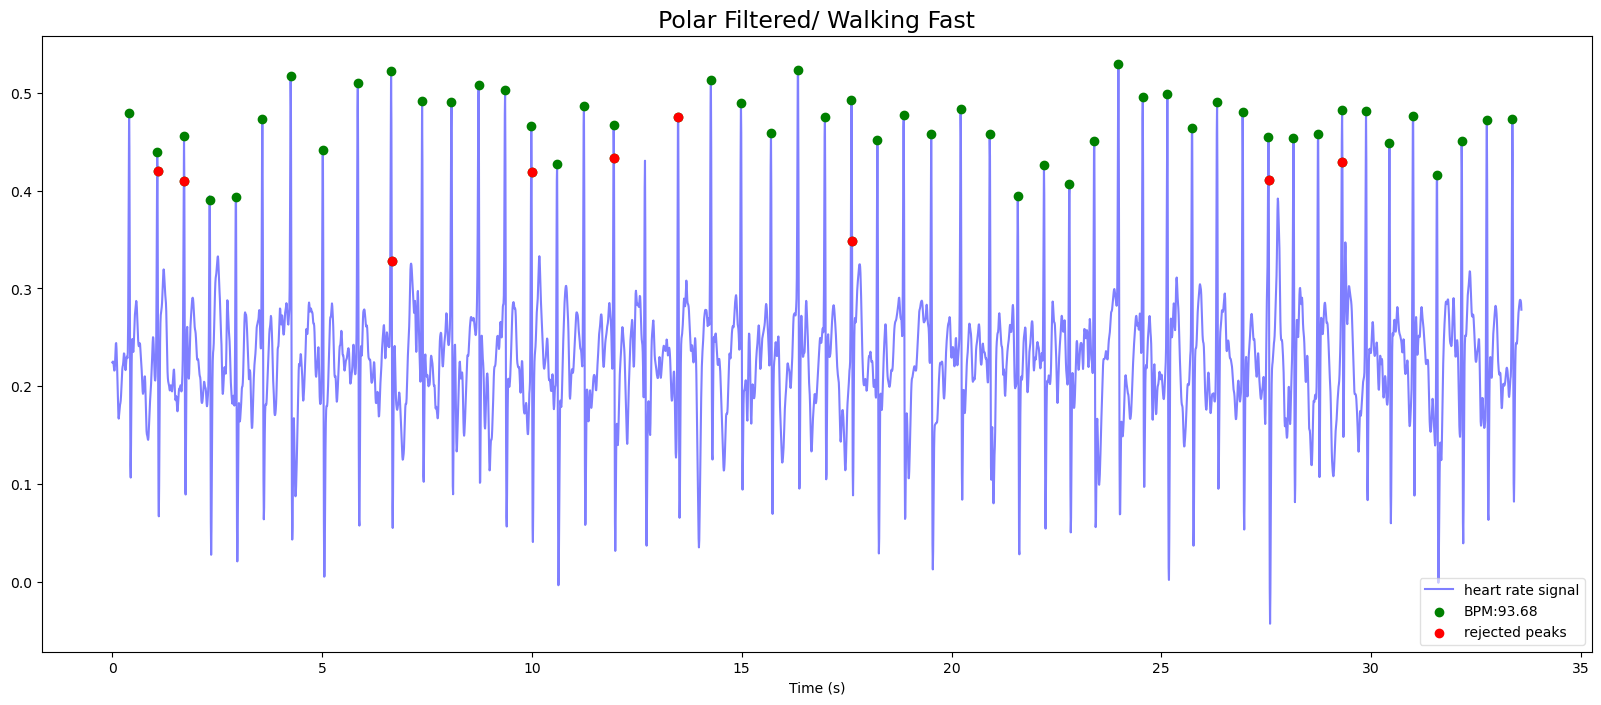

In [40]:
plt.rcParams["figure.figsize"] = [20,8]
wd_polar4, m_polar4 = hp.process(polar['filtered ecg'][fast_move200:finalend], sample_rate = polar_sps)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_polar4, m_polar4)

plt.title('Polar Filtered/ Walking Fast', fontsize = 17)

In [42]:
PPG200Filltered_WalkingFast = fontstyle.apply('PPG200 Filltered, Walking Fast', 'bold/Italic/orange/GREEN_BG')
print(PPG200Filltered_WalkingFast)
for measure in m_ppg4.keys():
    print('%s: %f' %(measure, m_ppg4[measure]))

PolarFilltered_WalkingFast = fontstyle.apply('Polar Filltered, Walking Fast', 'bold/Italic/orange/GREEN_BG')
print(PolarFilltered_WalkingFast)
for measure in m_polar4.keys():
    print('%s: %f' %(measure, m_polar4[measure]))

PPG200 Filltered, Walking Fast
bpm: 97.064110
ibi: 618.148148
sdnn: 166.911754
sdsd: 124.379013
rmssd: 237.647615
pnn20: 0.944444
pnn50: 0.833333
hr_mad: 105.000000
sd1: 161.004395
sd2: 159.525362
s: 80689.558924
sd1/sd2: 1.009271
breathingrate: 0.119832
Polar Filltered, Walking Fast
bpm: 93.680150
ibi: 640.477200
sdnn: 62.385954
sdsd: 23.859301
rmssd: 34.869296
pnn20: 0.393939
pnn50: 0.151515
hr_mad: 38.492473
sd1: 24.562881
sd2: 85.752833
s: 6617.251752
sd1/sd2: 0.286438
breathingrate: 0.190563


make window --> about 10 --> 20, then can recognize
#https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/heartpy.peakdetection.html

/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0.5, 1.0, 'ppg')

<Figure size 1200x400 with 0 Axes>

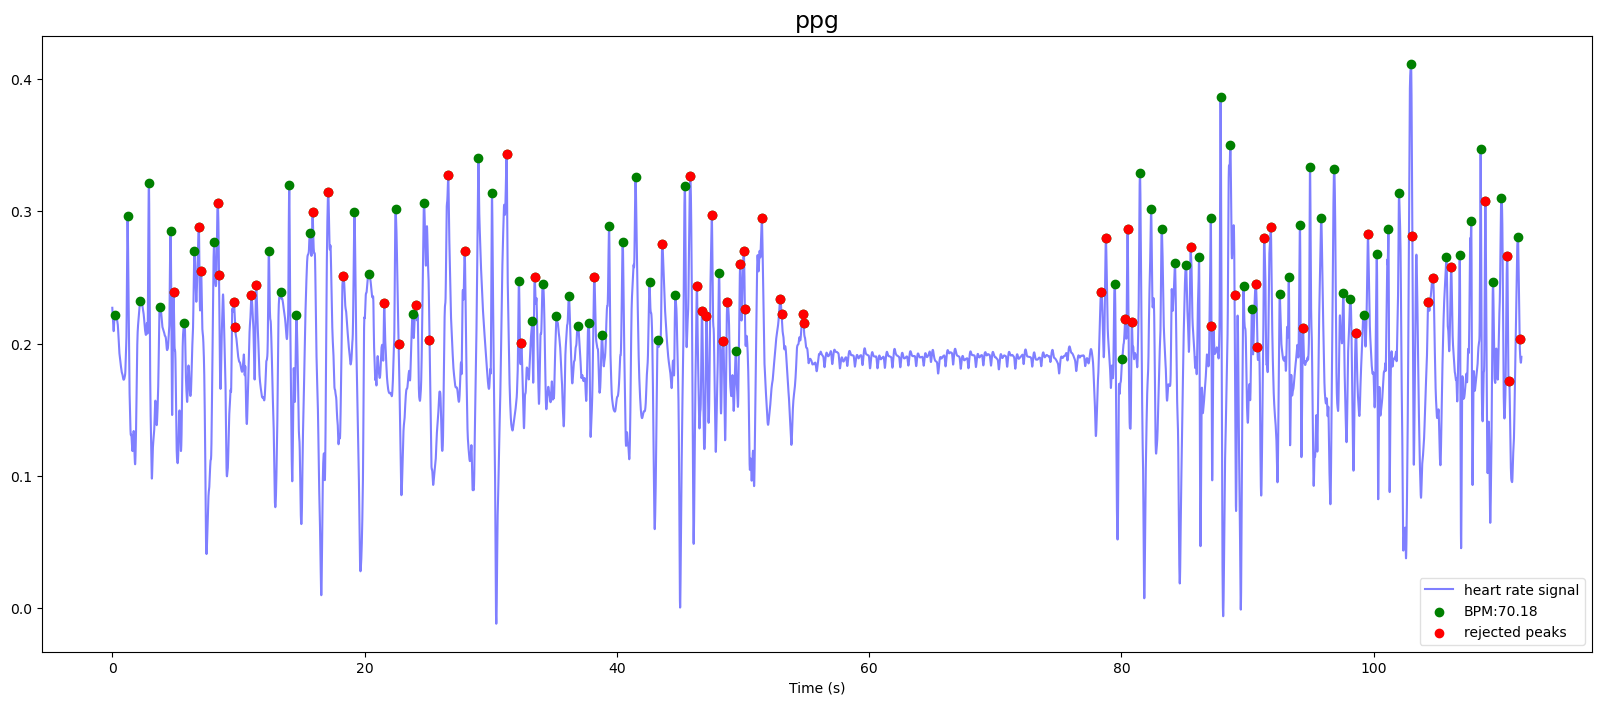

In [66]:
#fast_move200-->end
plt.rcParams["figure.figsize"] = [20,8]
wd_ppg, m_ppg = hp.process(ppg2['filtered ir'][slow_move200:finalend], sample_rate = 200.0)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_ppg, m_ppg)
plt.title('ppg', fontsize = 17)


Text(0.5, 1.0, 'polar')

<Figure size 1200x400 with 0 Axes>

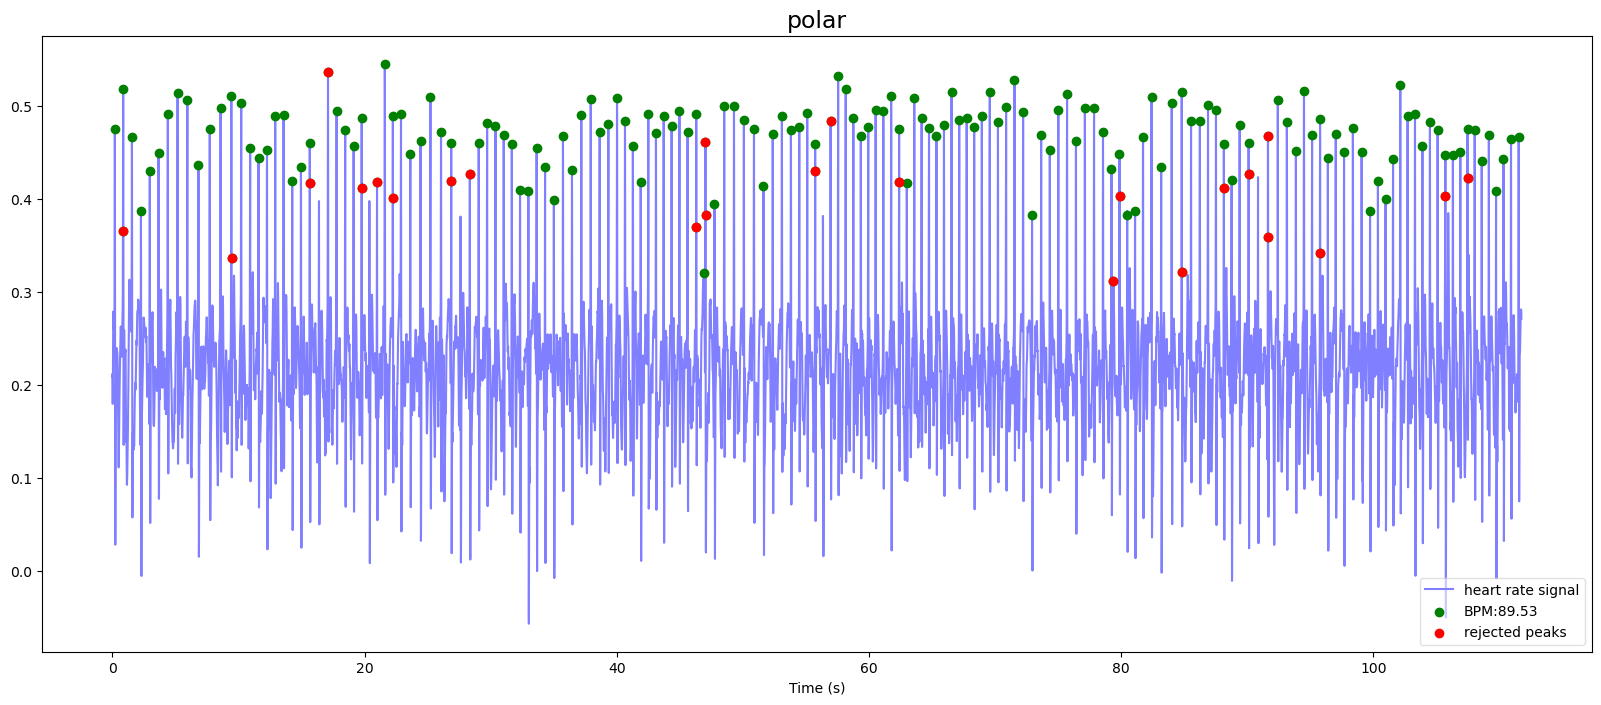

In [69]:
#fast_move200-->end
plt.rcParams["figure.figsize"] = [20,8]
wd_polar, m_polar = hp.process(polar['filtered ecg'][slow_move200:finalend], sample_rate = polar_sps)

plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd_polar, m_polar)
plt.title('polar', fontsize = 17)

In [ ]:
PPG200Filltered_WalkingFast = fontstyle.apply('PPG200 Filltered, Walking Fast', 'bold/Italic/orange/GREEN_BG')
print(PPG200Filltered_WalkingFast)
for measure in m_ppg4.keys():
    print('%s: %f' %(measure, m_ppg4[measure]))

PolarFilltered_WalkingFast = fontstyle.apply('Polar Filltered, Walking Fast', 'bold/Italic/orange/GREEN_BG')
print(PolarFilltered_WalkingFast)
for measure in m_polar4.keys():
    print('%s: %f' %(measure, m_polar4[measure]))